In [1]:
import datacube
import dask
from dask.distributed import Client
client = Client('dask-datacube-dask.odchub:8786')
client

Client Scheduler: tcp://dask-datacube-dask.odchub:8786 Dashboard: http://dask-datacube-dask.odchub:8787/status,Cluster Workers: 3 Cores: 6 Memory: 18.00 GB


In [2]:
%%time
%matplotlib inline

import datacube # Load the datacube library
import datetime
import numpy as np
import json
import matplotlib.pyplot as plt

dc = datacube.Datacube(app='dc-visualize')

# Mid Australia
lon = 137
lat = -25
buffer = 5

lon_min = lon - buffer
lon_max = lon + buffer

lat_min = lat - buffer
lat_max = lat + buffer

# Tasmania
# lon_min = 144.50
# lon_max = 148.50

# lat_min = -43.70
# lat_max = -40.56

# Australia
# lon_min = 113
# lon_max = 153

# lat_min = -44
# lat_max = -11

date_range = (
    datetime.datetime(2017, 1, 1),
    datetime.datetime(2017, 1, 1)
)

ds = dc.load(
    product='ls8_nbart_geomedian_annual',
    x=(lon_min, lon_max),
    y=(lat_min, lat_max),
    output_crs='epsg:3577',
    resolution=(-30, 30),
    time = date_range,
    measurements=['red', 'green', 'blue'],
    dask_chunks = {'x': 4000, 'y': 4000, 'time': 1}
)
ds

CPU times: user 776 ms, sys: 48 ms, total: 824 ms
Wall time: 1.08 s


In [3]:
average = ds.where(ds>0).mean()

In [4]:
#%%time
scaled = average / 3000

red = int(np.clip(scaled.red, 0, 1) * 255)
green = int(np.clip(scaled.green, 0, 1) * 255)
blue = int(np.clip(scaled.blue, 0, 1) * 255)

hex_colour = '#{:02x}{:02x}{:02x}'.format(
    int(red),
    int(green),
    int(blue)
)
print("Red: {}, Green: {}, Blue: {}".format(red, green, blue))

Red: 169, Green: 106, Blue: 65


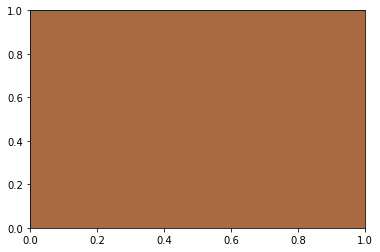

In [5]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
someX, someY = 0.5, 0.5
fig,ax = plt.subplots()
currentAxis = plt.gca()
currentAxis.add_patch(
    Rectangle((someX - 0.5, someY - 0.5), 1.0, 1.0, alpha=1, facecolor=hex_colour))

In [6]:
print("{:2.1f} billion pixels".format((ds.to_array().shape[2] * ds.to_array().shape[3])/1000000000))

1.3 billion pixels
